<a href="https://colab.research.google.com/github/punramon/python_dataviz2024/blob/main/HW7_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#นำเข้าข้อมูล

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_to_movie = '/content/drive/MyDrive/data_viz_2024_DATA/IMDb Movies India.csv'

In [ ]:
movie_df = pd.read_csv(path_to_movie, encoding='latin-1')
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


#จัดการข้อมูล

In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
#ตรวจสอบค่า null
movie_df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
movie_df = movie_df.dropna(subset=['Rating', 'Votes','Duration'])

In [ ]:
movie_df['Year'] = movie_df['Year'].str.replace('(', '').str.replace(')', '').astype(int)
movie_df['Duration'] = movie_df['Duration'].str.replace(' min', '').astype(int)
movie_df['Votes'] = movie_df['Votes'].str.replace(',', '')

<ipython-input-9-3ea375ecc81f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Year'] = movie_df['Year'].str.replace('(', '').str.replace(')', '').astype(int)
<ipython-input-9-3ea375ecc81f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Duration'] = movie_df['Duration'].str.replace(' min', '').astype(int)
<ipython-input-9-3ea375ecc81f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [ ]:
# ตรวจสอบและแปลงคอลัมน์ Votes เป็น float
movie_df['Votes'] = pd.to_numeric(movie_df['Votes'], errors='coerce')

<ipython-input-10-cdd5c73ce1e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Votes'] = pd.to_numeric(movie_df['Votes'], errors='coerce')


In [ ]:
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
movie_df.shape

(5851, 10)

In [ ]:
#หลังdropnaแล้วข้อมูลเหลือกี่%จากเดิม

print(f"ข้อมูลเหลือ {(len(movie_df) / len(pd.read_csv('/content/drive/MyDrive/data_viz_2024_DATA/IMDb Movies India.csv', encoding='latin-1'))) * 100:.2f}% จากเดิม")

ข้อมูลเหลือ 37.73% จากเดิม


In [ ]:
movie_df.duplicated().sum()

0

In [ ]:
movie_df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,31
Rating,0
Votes,0
Director,1
Actor 1,75
Actor 2,117
Actor 3,163


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# แยกประเภทหนังในคอลัมน์ Genre และเลือกประเภทแรกที่พบ
movie_df['Primary Genre'] = movie_df['Genre'].str.split(',').str[0]

# ดูประเภทหนังที่ไม่ซ้ำกัน
unique_genres = movie_df['Primary Genre'].unique()

# แสดงจำนวนและประเภทหนังที่ไม่ซ้ำกัน
print(f"จำนวนประเภทหนังทั้งหมด: {len(unique_genres)}")
print("ประเภทหนังที่ไม่ซ้ำกัน:")
print(unique_genres)

จำนวนประเภทหนังทั้งหมด: 21
ประเภทหนังที่ไม่ซ้ำกัน:
['Drama' 'Comedy' 'Horror' 'Action' 'Crime' 'Thriller' 'Adventure' 'Sport'
 'Biography' 'Documentary' 'Mystery' 'Musical' 'Romance' 'Fantasy'
 'Sci-Fi' 'Family' 'History' 'Animation' nan 'War' 'Music']


<ipython-input-17-c1d4aec5ee13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Primary Genre'] = movie_df['Genre'].str.split(',').str[0]


In [ ]:
# สร้าง index สำหรับแทนที่ประเภทหนังด้วยตัวเลข
genre_to_num = {genre: idx for idx, genre in enumerate(movie_df['Primary Genre'].unique())}
movie_df['Genre_Num'] = movie_df['Primary Genre'].map(genre_to_num)

# สรุปข้อมูล
summary = movie_df.groupby('Primary Genre').agg({
    'Rating': ['mean', 'median', 'min', 'max', 'count']
}).sort_values(('Rating', 'mean'), ascending=False)

summary.columns = ['Average Rating', 'Median Rating', 'Min Rating', 'Max Rating', 'Number of Movies']
summary = summary.reset_index()
summary

<ipython-input-18-8cc77333b5cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Genre_Num'] = movie_df['Primary Genre'].map(genre_to_num)


,Primary Genre,Average Rating,Median Rating,Min Rating,Max Rating,Number of Movies
0,Documentary,7.586154,7.70,4.1,9.3,130
1,Music,7.466667,6.80,5.9,9.7,3
2,History,7.333333,7.10,6.0,9.4,9
3,Biography,6.697619,6.95,2.4,8.9,84
4,Family,6.391228,6.40,2.6,9.3,57
5,Sci-Fi,6.320000,6.30,4.3,9.3,5
6,Drama,6.255253,6.50,1.6,10.0,1875
7,Fantasy,6.251613,6.60,2.4,8.0,31
8,Adventure,6.181905,6.50,2.4,8.4,105
9,Crime,6.132721,6.40,2.1,8.9,272


In [ ]:
# หา Genre ที่มีค่าเฉลี่ย Rating สูงสุดและต่ำสุด
top_genre = summary.iloc[0]
bottom_genre = summary.iloc[-1]

print(f"\nGenre ที่มีค่าเฉลี่ย Rating สูงสุด: {top_genre['Primary Genre']} (Average Rating: {top_genre['Average Rating']:.2f})")
print(f"Genre ที่มีค่าเฉลี่ย Rating ต่ำสุด: {bottom_genre['Primary Genre']} (Average Rating: {bottom_genre['Average Rating']:.2f})")

# หา Genre ที่มีจำนวนหนังมากที่สุดและน้อยที่สุด
most_movies = summary.loc[summary['Number of Movies'].idxmax()]
least_movies = summary.loc[summary['Number of Movies'].idxmin()]

print(f"\nGenre ที่มีจำนวนหนังมากที่สุด: {most_movies['Primary Genre']} ({most_movies['Number of Movies']} movies)")
print(f"Genre ที่มีจำนวนหนังน้อยที่สุด: {least_movies['Primary Genre']} ({least_movies['Number of Movies']} movies)")

# คำนวณค่าเฉลี่ย Rating ทั้งหมด
overall_avg_rating = movie_df['Rating'].mean()
print(f"\nค่าเฉลี่ย Rating ของหนังทั้งหมด: {overall_avg_rating:.2f}")


Genre ที่มีค่าเฉลี่ย Rating สูงสุด: Documentary (Average Rating: 7.59)
Genre ที่มีค่าเฉลี่ย Rating ต่ำสุด: War (Average Rating: 4.33)

Genre ที่มีจำนวนหนังมากที่สุด: Drama (1875 movies)
Genre ที่มีจำนวนหนังน้อยที่สุด: Sport (2 movies)

ค่าเฉลี่ย Rating ของหนังทั้งหมด: 5.93


#กราฟที่ 1

<ipython-input-44-585d4882c5fb>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-44-585d4882c5fb>:8: UserWarning:

The palette list has more values (21) than needed (20), which may not be intended.



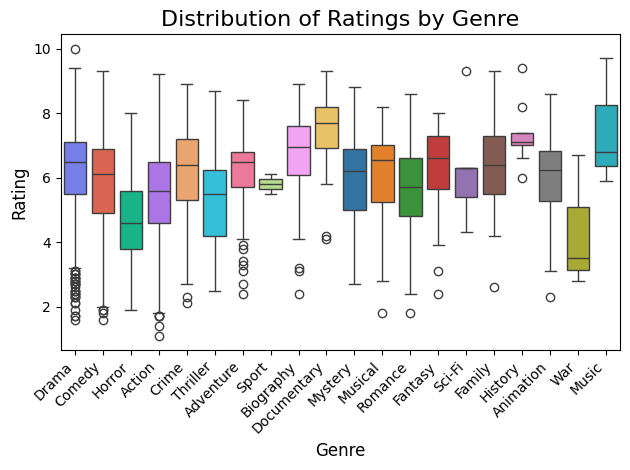

In [ ]:
# สร้างพาเลทสีที่มีจำนวนสีเท่ากับจำนวน Genre
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
          '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#FF5733']
# ใช้พาเลทสีที่กำหนด
sns.boxplot(
    x='Primary Genre',
    y='Rating',
    data=movie_df,
    palette=colors # ใช้พาเลทสีที่กำหนดเอง
)

# ตั้งชื่อและป้ายกำกับกราฟ
plt.title('Distribution of Ratings by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# แสดงกราฟ
plt.show()

In [ ]:
# สร้าง Scatter Plot ด้วย Plotly
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
          '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#FF5733']
fig = px.scatter(
    movie_df,
    x='Rating',
    y='Votes',
    color='Primary Genre',  # ใช้สีเพื่อแยกประเภท
    hover_name='Name',  # แสดงชื่อภาพยนตร์เมื่อ hover
    hover_data={'Year': True, 'Genre': True, 'Duration': True, 'Rating': True, 'Votes': True, 'Primary Genre': True},
    title='Scatter Plot of Rating vs. Votes',
    labels={'Rating': 'Rating', 'Votes': 'Votes'},
    color_discrete_sequence=colors # กำหนดสี
)

# ปรับแต่งกราฟ
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Votes',
    template='plotly_white'
)

# แสดงกราฟ
fig.show()

In [ ]:
# ข้อมูลค่าเฉลี่ย
avg_data = movie_df.groupby('Primary Genre')[['Rating', 'Votes']].median().reset_index()

# สร้างกราฟ scatter plot ด้วย Plotly
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
          '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#FF5733']
fig = px.scatter(
    avg_data,
    x='Rating',
    y='Votes',
    color='Primary Genre',  # สีแยกตาม Primary Genre
    size='Votes',  # ขนาดของฟองอากาศตามจำนวน Votes
    size_max=60,  # ขนาดสูงสุดของฟองอากาศ (ปรับให้เล็กลง)
    hover_name='Primary Genre',  # ข้อมูลที่แสดงเมื่อ hover
    hover_data={'Rating': True, 'Votes': True},  # ข้อมูลเพิ่มเติมที่แสดงเมื่อ hover
    title='Median Rating and Votes by Genre',
    labels={'Rating': 'Med Rating', 'Votes': 'Med Votes'},
    color_discrete_sequence=colors # กำหนดสี
)

# ปรับแต่ง Layout
fig.update_layout(
    xaxis_title='Med Rating',
    yaxis_title='Med Votes',
    template='plotly_white'
)

# แสดงกราฟ
fig.show()

#กราฟที่ 2

In [ ]:
# สร้างกราฟ
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A',
          '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52',
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#FF5733']
fig = px.scatter(
    movie_df,
    x='Year',
    y='Duration',
    color='Primary Genre',  # ใช้สีเพื่อแยกประเภท
    size='Rating',  # ขนาดของฟองอากาศแสดงถึงคะแนน
    hover_name='Name',  # แสดงชื่อภาพยนตร์เมื่อ hover
    hover_data={'Year': True, 'Duration': True, 'Rating': True, 'Primary Genre': True},
    title='Relationship between Year and Duration',
    labels={'Duration': 'Duration (minutes)', 'Rating': 'Rating'},
    color_discrete_sequence=colors # กำหนดสี
)

# ปรับแต่งกราฟ
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Duration (minutes)',
    coloraxis_colorbar=dict(title='Primary Genre'),
    template='plotly_white'
)

# แสดงกราฟ
fig.show()

In [ ]:
# คำนวณค่าสหสัมพันธ์ระหว่าง Year และ Duration
correlation = movie_df['Year'].corr(movie_df['Duration'])

print(f'Correlation between Year and Duration: {correlation}')


Correlation between Year and Duration: -0.3374252032853612
